In [1]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
import math as math

In [7]:
sbi =  yf.Ticker(str('SBIN')+'.NS').history(period="20y")

In [8]:
# short_mavg: Short-term moving average values
# long_mavg: Long-term moving average values
# signal: True if the short-term moving average is higher than the long-term
# moving average
# orders: 1 for the buy order, and -1 for the sell order:

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-05-31,34.359920,34.559792,32.575360,33.203526,66390107,0.0,0.0
2004-06-01,33.549729,34.406318,33.303459,33.499763,53077894,0.0,0.0
2004-06-02,33.050053,34.406317,32.978668,33.742462,54737688,0.0,0.0
2004-06-03,34.898867,35.248642,33.132150,33.524754,68670427,0.0,0.0
2004-06-04,33.257073,34.955974,32.982249,34.738258,55481063,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-24,830.000000,841.250000,827.000000,828.599976,12252075,0.0,0.0
2024-05-27,832.599976,839.400024,823.000000,833.700012,12295193,0.0,0.0
2024-05-28,835.700012,840.700012,823.299988,831.150024,13818893,0.0,0.0


In [11]:
def double_moving_average(financial_data, short_window,long_window):
    signals = pd.DataFrame(index=financial_data.index)
    signals['signal'] = 0.0
    signals['short_mavg'] = financial_data['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
    signals['long_mavg'] = financial_data['Close'].rolling(window=long_window,min_periods=1, center=False).mean()
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['orders'] = signals['signal'].diff()
    return signals
ts=double_moving_average(sbi,20,100)

In [14]:
ts

,signal,short_mavg,long_mavg,orders
Date,,,,
2004-05-31,0.0,33.203526,33.203526,NaN
2004-06-01,0.0,33.351645,33.351645,0.0
2004-06-02,0.0,33.481917,33.481917,0.0
2004-06-03,0.0,33.492626,33.492626,0.0
2004-06-04,0.0,33.741753,33.741753,0.0
...,...,...,...,...
2024-05-24,1.0,807.197540,719.696720,0.0
2024-05-27,1.0,808.917737,721.758455,0.0
2024-05-28,1.0,811.071033,723.691421,0.0


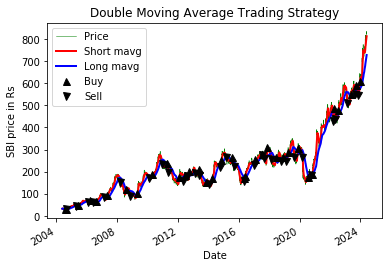

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='SBI price in Rs')
sbi['Close'].plot(ax=ax1, color='g', lw=.5)
ts["short_mavg"].plot(ax=ax1, color='r', lw=2.)
ts["long_mavg"].plot(ax=ax1, color='b', lw=2.)
ax1.plot(ts.loc[ts.orders== 1.0].index,
sbi['Close'][ts.orders == 1.0],'^', markersize=7, color='k')
ax1.plot(ts.loc[ts.orders== -1.0].index,
sbi['Close'][ts.orders == -1.0],'v', markersize=7, color='k')
plt.legend(["Price","Short mavg","Long mavg","Buy","Sell"])
plt.title("Double Moving Average Trading Strategy")
plt.show()